In [42]:
import os, sys; sys.path.append(f"/home/choij/workspace/tnp_tamsa/tdr-style")
import ROOT
import tdrstyle; tdrstyle.setTDRStyle(square=False)
ROOT.gStyle.SetErrorX(0.5)

In [78]:
ERA = "2016b"
#key = "NUM_TopHNT_DEN_TrackerMuons"
key = "NUM_Mu17Leg1_DEN_TopHNT"
#key = "NUM_Mu8Leg2_DEN_TopHNT"

In [79]:
# get central histogram
f = ROOT.TFile.Open(f"../results/TopHNT_Muon_v1/{key}_{ERA}/efficiency.root")
h_data = f.Get("data"); h_data.SetDirectory(0)
h_sim  = f.Get("sim"); h_sim.SetDirectory(0)
h_sf = f.Get("sf"); h_sf.SetDirectory(0)
f.Close()

In [80]:
# make pt average histograms (projection on Y)
# make histogram template
# data
h_data_projy1 = h_data.ProjectionY("_py1", 1, 1)
h_data_projy2 = h_data.ProjectionY("_py2", 2, 2)
h_data_projy3 = h_data.ProjectionY("_py3", 3, 3)
h_data_projy4 = h_data.ProjectionY("_py4", 4, 4)

h_data_avg = h_data_projy1.Clone("_py_avg")
for bin in range(1, h_data_avg.GetNbinsX()+1):
    avg = (h_data_projy1.GetBinContent(bin) + h_data_projy2.GetBinContent(bin) + h_data_projy3.GetBinContent(bin) + h_data_projy4.GetBinContent(bin)) / 4
    err = (h_data_projy1.GetBinError(bin) + h_data_projy2.GetBinError(bin) + h_data_projy3.GetBinError(bin) + h_data_projy4.GetBinError(bin)) / 4
    h_data_avg.SetBinContent(bin, avg)
    h_data_avg.SetBinError(bin, err)

# mc    
h_sim_projy1 = h_sim.ProjectionY("_py1", 1, 1)
h_sim_projy2 = h_sim.ProjectionY("_py2", 2, 2)
h_sim_projy3 = h_sim.ProjectionY("_py3", 3, 3)
h_sim_projy4 = h_sim.ProjectionY("_py4", 4, 4)

h_sim_avg = h_sim_projy1.Clone("_py_avg")
for bin in range(1, h_sim_avg.GetNbinsX()+1):
    avg = (h_sim_projy1.GetBinContent(bin) + h_sim_projy2.GetBinContent(bin) + h_sim_projy3.GetBinContent(bin) + h_sim_projy4.GetBinContent(bin)) / 4
    err = (h_sim_projy1.GetBinError(bin) + h_sim_projy2.GetBinError(bin) + h_sim_projy3.GetBinError(bin) + h_sim_projy4.GetBinError(bin)) / 4
    h_sim_avg.SetBinContent(bin, avg)
    h_sim_avg.SetBinError(bin, err)

# sf
h_sf_projy1 = h_sf.ProjectionY("_py1", 1, 1)
h_sf_projy2 = h_sf.ProjectionY("_py2", 2, 2)
h_sf_projy3 = h_sf.ProjectionY("_py3", 3, 3)
h_sf_projy4 = h_sf.ProjectionY("_py4", 4, 4)

h_sf_avg = h_sf_projy1.Clone("_sf_avg")
for bin in range(1, h_sf_avg.GetNbinsX()):
    avg = (h_sf_projy1.GetBinContent(bin) + h_sf_projy2.GetBinContent(bin) + h_sf_projy3.GetBinContent(bin) + h_sf_projy4.GetBinContent(bin)) / 4
    err = (h_sf_projy1.GetBinError(bin) + h_sf_projy2.GetBinError(bin) + h_sf_projy3.GetBinError(bin) + h_sf_projy4.GetBinError(bin)) / 4 
    h_sf_avg.SetBinContent(bin, avg)
    h_sf_avg.SetBinError(bin, err)

In [81]:
# decoration
h_data_avg.SetStats(0)
h_data_avg.SetLineColor(ROOT.kBlack)
h_data_avg.SetLineWidth(2)
h_data_avg.SetMarkerColor(ROOT.kBlack)
h_data_avg.SetMarkerStyle(8)
h_data_avg.SetMarkerSize(1)
h_data_avg.GetXaxis().SetLabelSize(0)
h_data_avg.GetYaxis().SetTitle("Efficiency")
h_data_avg.GetYaxis().SetTitleSize(0.04)
h_data_avg.GetYaxis().SetTitleOffset(1.25)
h_data_avg.GetYaxis().SetLabelSize(0.03)
h_data_avg.GetYaxis().SetRangeUser(0.6, 1.)

h_sim_avg.SetStats(0)
h_sim_avg.SetLineColor(ROOT.kBlue)
h_sim_avg.SetLineWidth(2)
h_sim_avg.SetMarkerColor(ROOT.kBlue)
h_sim_avg.SetMarkerStyle(8)
h_sim_avg.SetMarkerSize(1)

h_sf_avg.SetStats(0)
h_sf_avg.SetLineColor(ROOT.kBlack)
h_sf_avg.SetLineWidth(2)
h_sf_avg.SetMarkerColor(ROOT.kBlack)
h_sf_avg.SetMarkerStyle(8)
h_sf_avg.SetMarkerSize(1)
h_sf_avg.GetXaxis().SetTitle("p_{T} [GeV]")
h_sf_avg.GetXaxis().SetTitleSize(0.1)
h_sf_avg.GetXaxis().SetTitleOffset(0.9)
h_sf_avg.GetXaxis().SetLabelSize(0.08)
h_sf_avg.GetYaxis().SetTitle("S.F.")
h_sf_avg.GetYaxis().CenterTitle()
h_sf_avg.GetYaxis().SetTitleSize(0.1)
h_sf_avg.GetYaxis().SetTitleOffset(0.6)
h_sf_avg.GetYaxis().SetLabelSize(0.08)
h_sf_avg.GetYaxis().SetRangeUser(0.8, 1.12)

h_data_avg.GetXaxis().SetRangeUser(10, 120)
h_sf_avg.GetXaxis().SetRangeUser(10, 120)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file plots/TopHNT_Muon_v1/eff_NUM_Mu17Leg1_DEN_TopHNT_2016b.png has been created


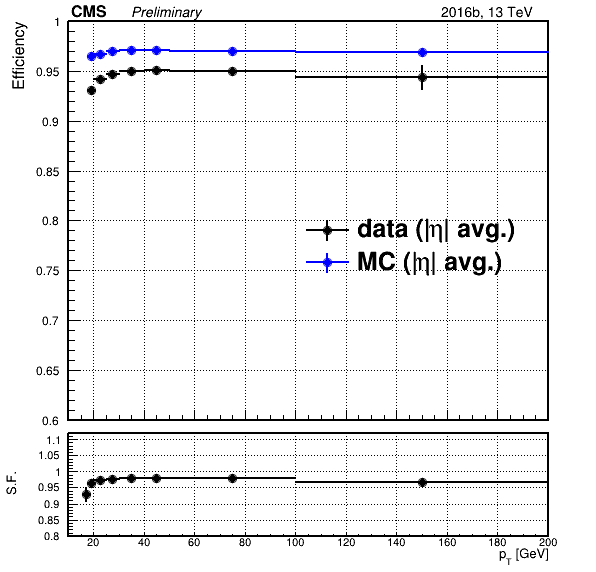

In [82]:
canvas = ROOT.TCanvas("canvas", "", 600, 600)
pad_up = ROOT.TPad("up", "", 0., 0.25, 1, 1)
pad_down = ROOT.TPad("down", "", 0, 0, 1, 0.25)
legend = ROOT.TLegend(0.5, 0.35, 0.9, 0.5)
legend.SetFillStyle(0)
legend.SetBorderSize(0)
text = ROOT.TLatex()
def setCOMText():
    text.SetTextSize(0.035)
    text.SetTextFont(42)
    
def setCMSText():
    text.SetTextSize(0.04)
    text.SetTextFont(61)
    
def setWIPText():
    text.SetTextSize(0.036)
    text.SetTextFont(52)

pad_up.SetGrid(True)
pad_up.SetBottomMargin(0.02)
pad_up.SetLeftMargin(0.115)
pad_up.SetRightMargin(0.08)

pad_down.SetGrid(True)
pad_down.SetTopMargin(0.03)
pad_down.SetBottomMargin(0.25)
pad_down.SetLeftMargin(0.115)
pad_down.SetRightMargin(0.08)
        
legend.AddEntry(h_data_avg, "data (|#eta| avg.)", "lep")
legend.AddEntry(h_sim_avg, "MC (|#eta| avg.)", "lep")

pad_up.cd()
h_data_avg.Draw()
h_sim_avg.Draw("same")
legend.Draw()
pad_up.RedrawAxis()
setCOMText(); text.DrawLatexNDC(0.74, 0.96, f"{ERA}, 13 TeV")
setCMSText(); text.DrawLatexNDC(0.12, 0.96, "CMS")
setWIPText(); text.DrawLatexNDC(0.22, 0.96, "Preliminary")

pad_down.cd()
h_sf_avg.Draw()
pad_down.RedrawAxis()

canvas.cd()
pad_up.Draw()
pad_down.Draw("same")
canvas.Draw()
canvas.SaveAs(f"plots/TopHNT_Muon_v1/eff_{key}_{ERA}.png")